In [2]:
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import sklearn

# *description*

* **Title:** Tells us the name of the movie / series

* **Genre**: Describes the genre of the movie / series

* **Tag**: is a list of tags on the movie / series

* **Language**: Indicates in which language the film / series is available

* **Series or Movie**: Indicates whether this product is a TV series or a movie

* **Hidden Gem Score**: This is a score that suggests if this movie / series is a hidden gem (i.e. something that is not mainstream but is a great product and may deserve more attention)

* **Country Availability**: Please indicate in which country this film / series is available

* **Runtime**: Indicates the duration of the movie or an episode of the series

* **Director**: Tells us how is the director of this product

* **Writer**: Tells us how is the writer of this product

* **Actors**: Tells us how are the main actors of this product

* **View Rating**: Indicates the rating of the product

* **IMDb Score**: This is the score given to the product by IMDb

* **Rotten Tomatoes Score**: This is the score given to the product by Rotten Tomatoes

* **Awards Received**: It tells us how much awards this film/serie has received

* **Awards Nominated For**: It tells us for which awards this film/movie has been nominated

* **Release Date**: It indicates when this product has been released

* **Netflix Release Date**: It indicates when this product has been released on Netflix

* **Summary**: It tells us a little summary of the plot of the product

* **MDb Votes**: It indicates the scores given by IMDb

* **Image**: An Image

* **Released_Year**: It indicates the year the product was released

* **Released_Year_Net**: It indicates the year the product was released on Netflix

In [3]:
url = 'https://raw.githubusercontent.com/notnvm/ML-course/main/netflix.csv'
data = pd.read_csv(url)
data.head(2)

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube


In [4]:
rows, cols = data.shape
elements = rows*cols

print("elements: ", rows)

miss = data.isnull().sum().sum()
print(f'miss: {miss} ' + '(' + '{:.2f}'.format(miss / elements * 100) + '%)')

elements:  15480
miss: 111938 (24.93%)


In [5]:
print(list(data.columns.values))

['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie', 'Hidden Gem Score', 'Country Availability', 'Runtime', 'Director', 'Writer', 'Actors', 'View Rating', 'IMDb Score', 'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received', 'Awards Nominated For', 'Boxoffice', 'Release Date', 'Netflix Release Date', 'Production House', 'Netflix Link', 'IMDb Link', 'Summary', 'IMDb Votes', 'Image', 'Poster', 'TMDb Trailer', 'Trailer Site']


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  15480 non-null  object 
 1   Genre                  13770 non-null  object 
 2   Tags                   15413 non-null  object 
 3   Languages              13526 non-null  object 
 4   Series or Movie        15480 non-null  object 
 5   Hidden Gem Score       13379 non-null  float64
 6   Country Availability   15461 non-null  object 
 7   Runtime                15479 non-null  object 
 8   Director               10772 non-null  object 
 9   Writer                 11150 non-null  object 
 10  Actors                 13555 non-null  object 
 11  View Rating            8456 non-null   object 
 12  IMDb Score             13381 non-null  float64
 13  Rotten Tomatoes Score  6382 non-null   float64
 14  Metacritic Score       4336 non-null   float64
 15  Aw

In [7]:
data['Genre'].unique()

array(['Crime, Drama, Fantasy, Horror, Romance', 'Comedy',
       'Drama, Thriller', ..., 'Action, Animation, Comedy, Romance',
       'Animation, Action, Adventure, Fantasy, Sport, Thriller',
       'Adventure, Drama, Fantasy, Romance, Thriller'], dtype=object)

In [8]:
data['Summary']

0        A med student with a supernatural gift tries t...
1        When nerdy Johanna moves to London, things get...
2        Trapped in a frozen car during a blizzard, a p...
3        Upon moving into a new place, a 20-something r...
4        Inspired by her moms rebellious past and a con...
                               ...                        
15475    Seung Yeon decides to chase her dream of becom...
15476    Shrek celebrates Halloween, Puss in Boots is c...
15477    Madagascar goes wild with holiday spirit in th...
15478    Join your DreamWorks friends for these four ho...
15479    In this pair of adventures, Po tells the story...
Name: Summary, Length: 15480, dtype: object

# Описание принаков


1.   **Series or Movie** - Бинарный
2.  **Genre**; **Languages**; **Runtime**; **Director**; **Writer**; **Actors**; **View Rating** - Категориальные
3.   **Hidden Gem Score**; **IMDb Score**; **Rotten Tomatoes Score**; **Metacritic Score**; **Awards Received**; **Awards Nominated for** - Числовые
4.   **Summary** - Текстовый







In [9]:
data.describe()

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,IMDb Votes
count,13379.000000,13381.000000,6382.000000,4336.000000,6075.000000,7661.000000,1.337900e+04
mean,5.937551,6.496054,59.523034,56.813653,8.764444,13.983161,4.272841e+04
std,2.250202,1.146910,26.999173,17.582545,18.311171,29.821052,1.257012e+05
min,0.600000,1.000000,0.000000,5.000000,1.000000,1.000000,5.000000e+00
25%,3.800000,5.800000,38.000000,44.000000,1.000000,2.000000,4.035000e+02
50%,6.800000,6.600000,64.000000,57.000000,3.000000,5.000000,2.322000e+03
75%,7.900000,7.300000,83.000000,70.000000,8.000000,12.000000,2.089050e+04
max,9.800000,9.700000,100.000000,100.000000,300.000000,386.000000,2.354197e+06


# Визуализация

<Axes: >

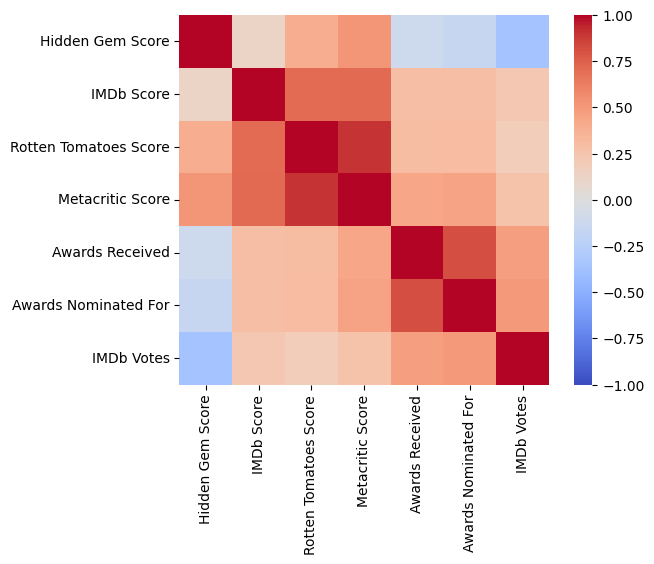

In [10]:
corr = data.corr(numeric_only=True)
sns.heatmap(corr, square=True, fmt='.2f', vmin=-1, cmap='coolwarm')

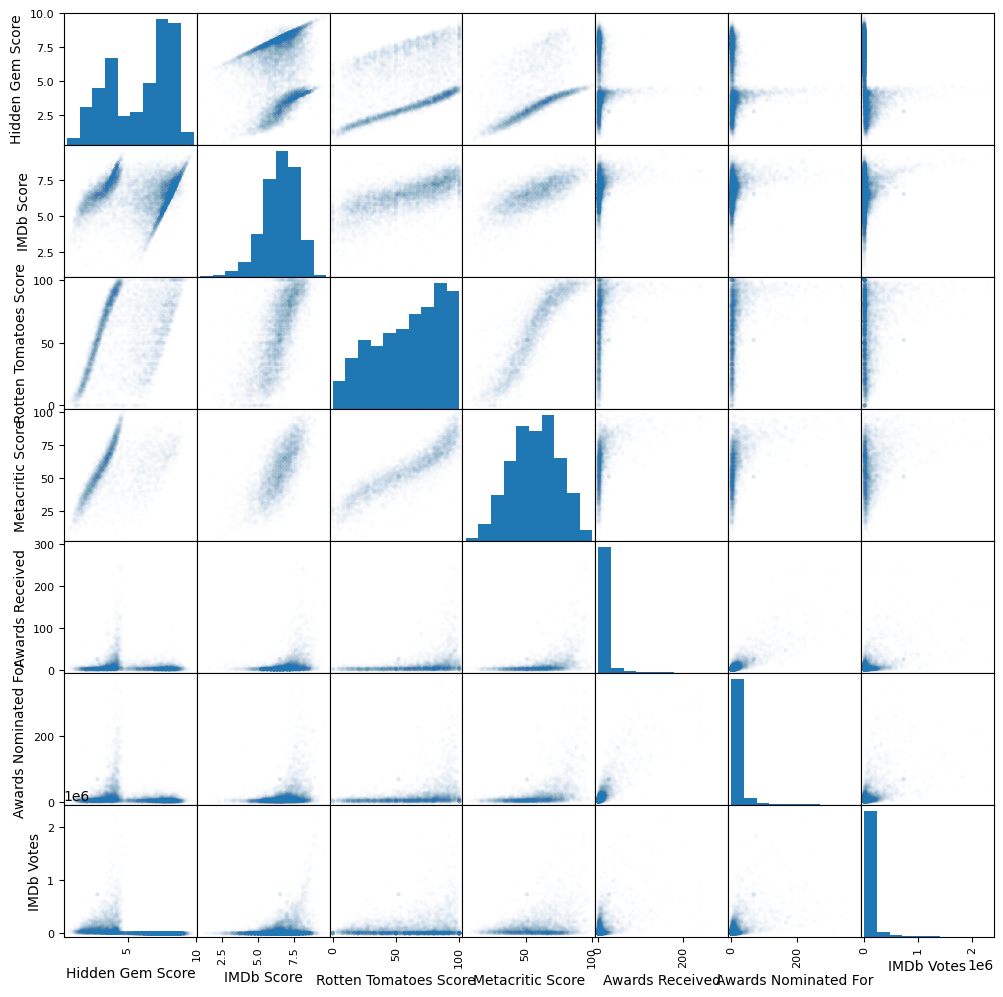

In [11]:
pd.plotting.scatter_matrix(data, alpha = .01, figsize = (12,12))
pass

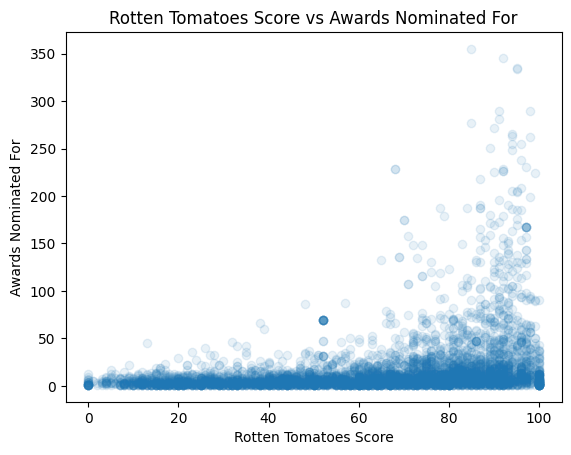

In [12]:
plt.plot(data['Rotten Tomatoes Score'], data['Awards Nominated For'], 'o', alpha = 0.1)

plt.xlabel('Rotten Tomatoes Score')
plt.ylabel('Awards Nominated For')

plt.title('Rotten Tomatoes Score vs Awards Nominated For')
pass

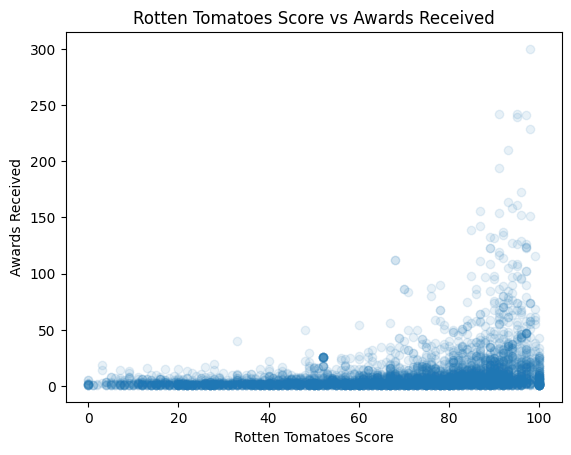

In [13]:
plt.plot(data['Rotten Tomatoes Score'], data['Awards Received'], 'o', alpha = 0.1)

plt.xlabel('Rotten Tomatoes Score')
plt.ylabel('Awards Received')

plt.title('Rotten Tomatoes Score vs Awards Received')
pass

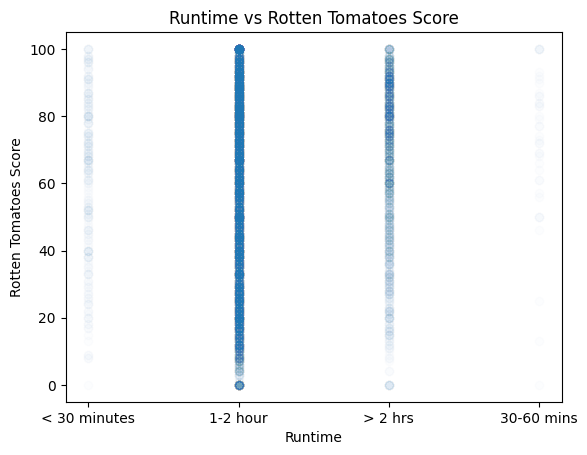

In [14]:
plt.plot(data['Runtime'].astype(str), data['Rotten Tomatoes Score'], 'o', alpha = 0.01)
plt.xlabel('Runtime')
plt.ylabel('Rotten Tomatoes Score')
plt.title('Runtime vs Rotten Tomatoes Score')
pass

# Результаты

*   Исходя из графиков можно сделать вывод, что фильмы с **высоким рейтингом Rotten Tomatoes** чаще всего номинируются на награды.
*   Фильмы с продолжительностью **более 2х часов** чаще получают высокие оценки



In [15]:
data.isnull().sum()
lbls = ['Title', 'Country Availability', 'Tags', 'Boxoffice', 'Release Date', 'Netflix Release Date', \
        'Netflix Link', 'IMDb Link', 'Summary', 'Image', 'TMDb Trailer', 'Poster', 'Trailer Site']
data = data.drop(labels=lbls, axis=1)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Genre                  13770 non-null  object 
 1   Languages              13526 non-null  object 
 2   Series or Movie        15480 non-null  object 
 3   Hidden Gem Score       13379 non-null  float64
 4   Runtime                15479 non-null  object 
 5   Director               10772 non-null  object 
 6   Writer                 11150 non-null  object 
 7   Actors                 13555 non-null  object 
 8   View Rating            8456 non-null   object 
 9   IMDb Score             13381 non-null  float64
 10  Rotten Tomatoes Score  6382 non-null   float64
 11  Metacritic Score       4336 non-null   float64
 12  Awards Received        6075 non-null   float64
 13  Awards Nominated For   7661 non-null   float64
 14  Production House       5149 non-null   object 
 15  IM

In [16]:
data.describe()

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,IMDb Votes
count,13379.000000,13381.000000,6382.000000,4336.000000,6075.000000,7661.000000,1.337900e+04
mean,5.937551,6.496054,59.523034,56.813653,8.764444,13.983161,4.272841e+04
std,2.250202,1.146910,26.999173,17.582545,18.311171,29.821052,1.257012e+05
min,0.600000,1.000000,0.000000,5.000000,1.000000,1.000000,5.000000e+00
25%,3.800000,5.800000,38.000000,44.000000,1.000000,2.000000,4.035000e+02
50%,6.800000,6.600000,64.000000,57.000000,3.000000,5.000000,2.322000e+03
75%,7.900000,7.300000,83.000000,70.000000,8.000000,12.000000,2.089050e+04
max,9.800000,9.700000,100.000000,100.000000,300.000000,386.000000,2.354197e+06


In [17]:
vals = {
    'Hidden Gem Score': data.loc[:, 'Hidden Gem Score'].mean(),
    'RunTime': '1-2 hour',
    'View Rating': 'Unrated',
    'IMDb Score': data.loc[:, 'IMDb Score'].mean(),
    'IMDb Votes': data.loc[:, 'IMDb Votes'].mean(),
    'Awards Received': 0,
    'Awards Nominated For': 0,
}

data = data.fillna(value=vals)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Genre                  13770 non-null  object 
 1   Languages              13526 non-null  object 
 2   Series or Movie        15480 non-null  object 
 3   Hidden Gem Score       15480 non-null  float64
 4   Runtime                15479 non-null  object 
 5   Director               10772 non-null  object 
 6   Writer                 11150 non-null  object 
 7   Actors                 13555 non-null  object 
 8   View Rating            15480 non-null  object 
 9   IMDb Score             15480 non-null  float64
 10  Rotten Tomatoes Score  6382 non-null   float64
 11  Metacritic Score       4336 non-null   float64
 12  Awards Received        15480 non-null  float64
 13  Awards Nominated For   15480 non-null  float64
 14  Production House       5149 non-null   object 
 15  IM

In [18]:
lbls = ['Production House', 'Metacritic Score', 'Rotten Tomatoes Score']
data = data.drop(labels=lbls, axis=1)
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9901 entries, 0 to 15473
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Genre                 9901 non-null   object 
 1   Languages             9901 non-null   object 
 2   Series or Movie       9901 non-null   object 
 3   Hidden Gem Score      9901 non-null   float64
 4   Runtime               9901 non-null   object 
 5   Director              9901 non-null   object 
 6   Writer                9901 non-null   object 
 7   Actors                9901 non-null   object 
 8   View Rating           9901 non-null   object 
 9   IMDb Score            9901 non-null   float64
 10  Awards Received       9901 non-null   float64
 11  Awards Nominated For  9901 non-null   float64
 12  IMDb Votes            9901 non-null   float64
dtypes: float64(5), object(8)
memory usage: 1.1+ MB


In [19]:
categorical_cols = [el for el in data.columns if data[el].dtype.name == 'object']
numerical_cols = [el for el in data.columns if data[el].dtype.name != 'object']
binary_cols = [el for el in categorical_cols if data.describe(include=[object])[el]['unique'] == 2]

binary_cols

['Series or Movie']

In [20]:
data.loc[data['Series or Movie'] == 'Series', 'Series or Movie'] = 0
data.loc[data['Series or Movie'] == 'Movie', 'Series or Movie'] = 1

In [ ]:
Runtime = data['Runtime'].str.get_dummies()
Director = data['Director'].str.get_dummies(",")
View = data['View Rating'].str.get_dummies()
Writer = data['Writer'].str.get_dummies(",")
Actors = data['Actors'].str.get_dummies(",")
Genre = data['Genre'].str.get_dummies(",")
Languages = data['Languages'].str.get_dummies(",")

data_nb = pd.concat((Runtime, Director, View, Actors,Writer, Genre, Languages), axis = 1)
data_nb

In [ ]:
data['IMDb Score'] = np.round(data['IMDb Score'])
data['IMDb Score'].describe()

In [ ]:
d_num = data[numerical_cols]
d_num = (d_num - d_num.mean(axis = 0))/d_num.std(axis = 0)
d_num

In [ ]:
data = pd.concat((d_num, data_nb, data[binary_cols], data["IMDb Score"]), axis = 1)

# Тестовая и обучающая выборки
**Предскажем рейтинг IMDb**

In [ ]:
X = data.drop('IMDb Score', axis = 1)
Y = data['IMDb Score']

X=X.to_numpy()
Y=Y.to_numpy()

10% - тестовая выборка


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 3)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N2_train = Y_train.shape
N2_test = Y_test.shape

print(N_train, N_test, N2_train, N2_test)

In [ ]:
Y_test = Y_test.astype("int")
Y_train = Y_train.astype("int")

# Обучение
**k-ближайших соседей**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors = 27)
knn.fit(X_train, Y_train)
Y_test_predict = knn.predict(X_test)
Y_train_predict = knn.predict(X_train)
err_test  = np.mean(Y_test  != Y_test_predict)
err_train  = np.mean(Y_train != Y_train_predict)

print("err_train=", err_train)
print("err_test=", err_test)


print(confusion_matrix(Y_train, Y_train_predict), end="\n\n")
print(confusion_matrix(Y_test, Y_test_predict), end="\n\n")